# Cryptocurrency Backtesting Example
This notebook demonstrates how to use the backtesting framework with market data.

In [1]:
import sys
sys.path.append('..')

from backtesting_framework.main import BacktestingEngine
from backtesting_framework.strategies.base import Strategy
import pandas as pd
import matplotlib.pyplot as plt

## 1. Create a Simple Strategy
Let's create a simple moving average crossover strategy as an example.

In [2]:
class MovingAverageCrossoverStrategy(Strategy):
    def __init__(self, short_window=20, long_window=50):
        self.short_window = short_window
        self.long_window = long_window
    
    def generate_signals(self, data):
        # Calculate moving averages
        data['SMA_short'] = data['price_usd_close'].rolling(window=self.short_window).mean()
        data['SMA_long'] = data['price_usd_close'].rolling(window=self.long_window).mean()
        
        # Generate signals (1 for buy, -1 for sell, 0 for hold)
        data['signal'] = 0
        data.loc[data['SMA_short'] > data['SMA_long'], 'signal'] = 1
        data.loc[data['SMA_short'] < data['SMA_long'], 'signal'] = -1
        
        return data
    
    def calculate_position_size(self, data, capital):
        # Calculate how many units we can buy/sell based on capital and current price
        price = data['price_usd_close'].iloc[0]
        quantity = capital / price  # Calculate actual quantity based on price
        
        return pd.DataFrame({
            'position': [quantity * data['signal'].iloc[0]]  # Multiply quantity by signal
        })

## 2. Initialize and Run Backtest

In [3]:
# Initialize the backtesting engine
data_path = 'data/market_data'
engine = BacktestingEngine(data_path=data_path, initial_capital=100000)

# Create strategy instance
strategy = MovingAverageCrossoverStrategy(short_window=20, long_window=50)

# Run backtest
results = engine.run_backtest(
    strategy=strategy,
    start_timestamp=1577836800000,  # 2020-01-01 in Unix milliseconds
    end_timestamp=1704067199000     # 2023-12-31 in Unix milliseconds
)

c:\Users\adam arbain\ichiboss-\backtesting_framework\data\preprocessor.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[col].fillna(features[col].mean(), inplace=True)



Timestamp: 1584057600000
Signal: 1
Current Capital: $100,000.00
Current Position: 0 BTC
Order Type: buy
Order Quantity: 15822.78481012658
Order Price: $6.32
Updated Capital: $0.00
Updated Position: 15822.78481012658 BTC

Timestamp: 1584316800000
Signal: -1
Current Capital: $0.00
Current Position: 15822.78481012658 BTC
Order Type: sell
Order Quantity: 15822.78481012658
Order Price: $5.54
Updated Capital: $87,642.41
Updated Position: 0.0 BTC

Timestamp: 1584403200000
Signal: -1
Current Capital: $87,642.41
Current Position: 0.0 BTC

Timestamp: 1584489600000
Signal: -1
Current Capital: $87,642.41
Current Position: 0.0 BTC

Timestamp: 1584576000000
Signal: -1
Current Capital: $87,642.41
Current Position: 0.0 BTC

Timestamp: 1584662400000
Signal: -1
Current Capital: $87,642.41
Current Position: 0.0 BTC

Timestamp: 1584921600000
Signal: -1
Current Capital: $87,642.41
Current Position: 0.0 BTC

Timestamp: 1585008000000
Signal: -1
Current Capital: $87,642.41
Current Position: 0.0 BTC

Timestam

## 3. Analyze Results

Performance Metrics:
{'total_return': 1.882340354049835e+37, 'sharpe_ratio': 0.09072484319492233, 'max_drawdown': -159.55981027784836, 'win_rate': 0.051643192488262914, 'total_trades': 213, 'avg_trade_return': 1.1656287005287767e+40}

Detailed Report:

Performance Report
-----------------
Initial Capital: $100,000.00
Total Return: 1882340354049834996233199341471361138688.00%
Sharpe Ratio: 0.09
Max Drawdown: -15955.98%
Win Rate: 5.16%
Total Trades: 213
Average Trade Return: $11,656,287,005,287,767,431,173,653,358,325,039,890,432.00


Trade History:
              timestamp symbol  type      quantity   price         value
0   2020-03-13 08:00:00    BTC   buy  1.582278e+04   6.320  1.000000e+05
1   2020-03-16 08:00:00    BTC  sell  1.582278e+04   5.539  8.764241e+04
2   2020-05-05 08:00:00    BTC   buy  8.738026e+03  10.030  8.764241e+04
3   2020-07-06 08:00:00    BTC  sell  8.738026e+03   9.940  8.685598e+04
4   2020-08-04 08:00:00    BTC   buy  6.579999e+03  13.200  8.685598e+04
..      

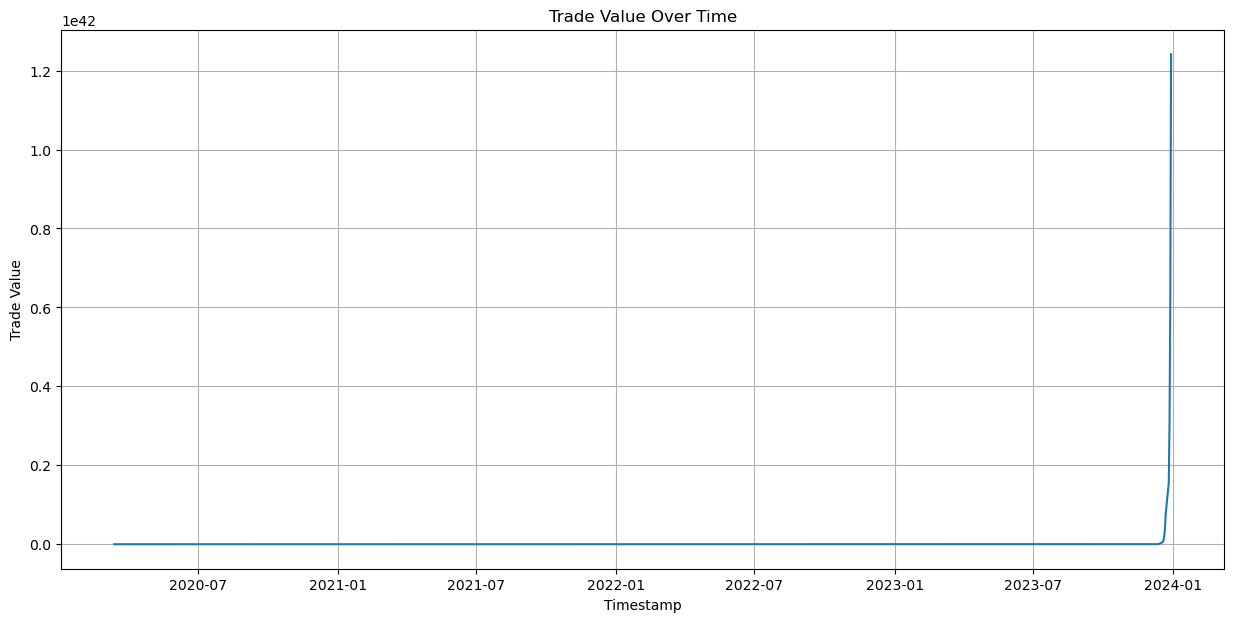

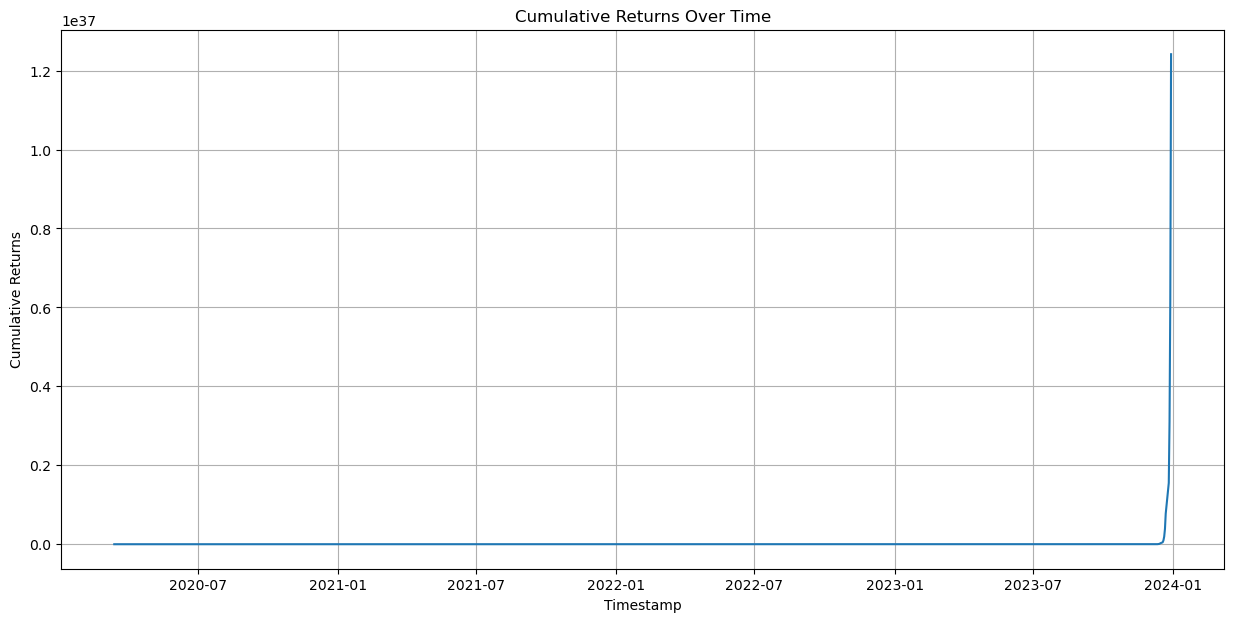

In [4]:
# Display performance metrics
print("Performance Metrics:")
print(results['metrics'])

# Display detailed report
print("\nDetailed Report:")
print(results['report'])

# Plot trade history
trade_history = results['trade_history']
print("\nTrade History:")
print(trade_history)
plt.figure(figsize=(15, 7))
plt.plot(trade_history['timestamp'], trade_history['value'])
plt.title('Trade Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Trade Value')
plt.grid(True)
plt.show()

# convert trade history timestamps to datetime for better plotting
trade_history['timestamp'] = pd.to_datetime(trade_history['timestamp'], unit='ms')

# convert trade history values to csv for further analysis
trade_history.to_csv('trade_history.csv', index=False)

# Calculate cumulative returns
trade_history['cumulative_returns'] = (trade_history['value'] / trade_history['value'].iloc[0]).fillna(0)

plt.figure(figsize=(15, 7))
plt.plot(trade_history['timestamp'], trade_history['cumulative_returns'])
plt.title('Cumulative Returns Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()